In [1]:
using Random, Distributions
Random.seed!(123)
using Plots
using Roots
using Pkg
using Optim

var(d): 2.1630185657307766


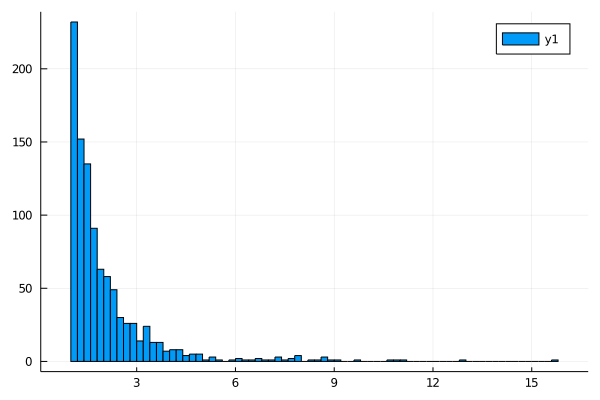

In [196]:
# Build a Power Law distributed process here

# Number of samples (cities, firms, etc.)
N = 1000

# Horizon
H = 10000

# Start all scaled beyond lower bound
init_scale = 1.01

# sigma in diffusion
g_sd = 0.01
# mu in diffusion
g_mu = 0.000

# Not used really
shape_F = 1.0
scale_F = 1.0
# F = Pareto(shape_F, scale_F)

# Get consistent results
# Random.seed!(1234)

# Start all the samples
d = ones(N).* scale_F .* init_scale

# Run forward
for i in 1:H
    for j in 1:N
        if rand() > 1/2
            # Up shock
            d[j] += (g_mu + g_sd)*d[j]
        else
            # Down shock
            d[j] += (g_mu - g_sd)*d[j]
        end
        
        # Switch between lognormal and power law
        # Reflecting barrier
        if d[j] < scale_F
            d[j] = scale_F
        end
    end
end

# Normalize ?
# d /= sqrt(H)

println("var(d): ", var(d))
histogram(d, mode = pdf)

# N = 50000
# H = 10000
# var(d): 2.5283006616100545


In [18]:
# Generate some power-law draws to use for agent mass example

shape_G = 1.059 # Axtell (2001)
scale_G = 1.0
G = Pareto(shape_G, scale_G)
Random.seed!(1234)


draws = rand(G,10)

function normalize_draws(d)
    return d ./ sum(d)
end

ndraws = normalize_draws(draws)
sort!(ndraws)
# bar(cumsum(ndraws))

10-element Array{Float64,1}:
 0.032808613419885634
 0.035185869889927356
 0.041938608902102534
 0.04352039945706277
 0.04560931893014688
 0.04572033281118715
 0.08138369019686356
 0.09925069223385334
 0.24729632045048616
 0.3272861537084845